In [44]:
#face forgery detection 

In [9]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from  tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [12]:
try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
deprecation._PER_MODULE_WARNING_LIMIT = 0

In [13]:

nbatch = 128
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory( r'C:\pro\dataset\training',
                                                 target_size=(128,128),
                                                 batch_size =nbatch,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(r'C:\pro\dataset\test\real and fake',
                                            target_size=(128,128),
                                            batch_size =nbatch,
                                            class_mode = 'binary')

Found 1748 images belonging to 4 classes.
Found 1437 images belonging to 2 classes.


Text(0.5, 0, 'Class')

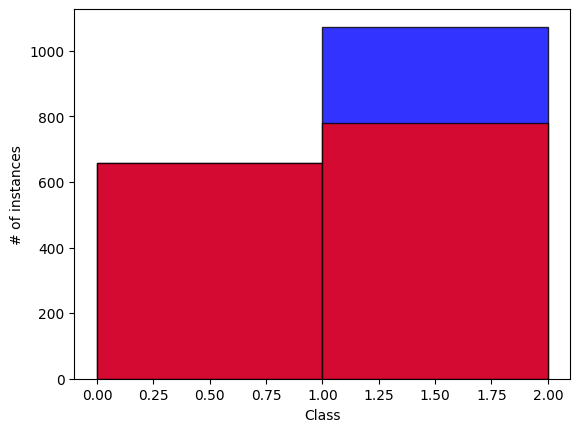

In [14]:
h1 = plt.hist(training_set.classes, bins=range(0,3), alpha=0.8, color='blue', edgecolor='black')
h2 = plt.hist(test_set.classes,  bins=range(0,3), alpha=0.8, color='red', edgecolor='black')
plt.ylabel('# of instances')
plt.xlabel('Class')

(128, 128, 128, 3) (128,)


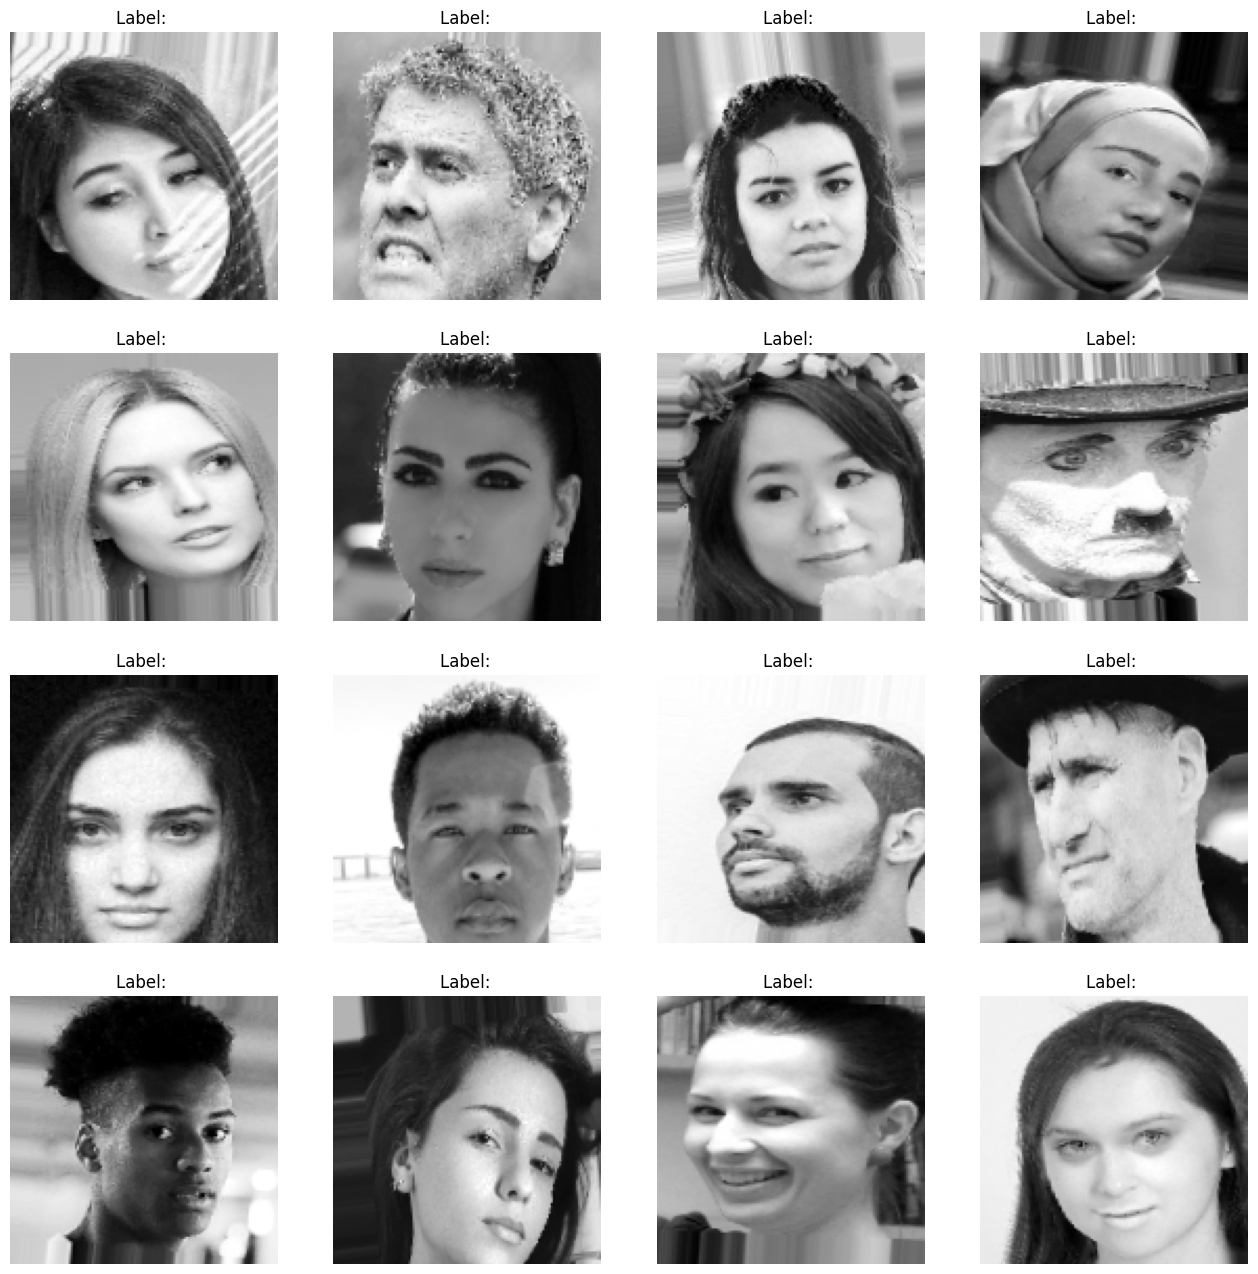

In [15]:
for X, y in training_set:
    print(X.shape, y.shape)
    plt.figure(figsize=(16,16))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.axis('off')
        plt.title('Label: ')
        img = np.uint8(255*X[i,:,:,0])
        plt.imshow(img, cmap='gray')
    break

In [16]:
#convolutional neural net
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(128,128,3)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(activation="relu",
                units=256))

model.add(Dense(activation="sigmoid",
                units=1))


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,516,289 (24.86 MB)

 Trainable params: 6,516,289 (24.86 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=10),  
    ModelCheckpoint(filepath='model_checkpoint.keras', monitor='val_loss', save_best_only=True, mode='min')  
]


In [20]:


model.compile(optimizer='adam',              
              loss='categorical_crossentropy',
              metrics=['accuracy'])          

history = model.fit(
    training_set,
    steps_per_epoch=len(training_set),   
    epochs=10,
    validation_data=test_set,
    validation_steps=len(test_set),     
    callbacks=callbacks_list
)




Epoch 1/10


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


14/14 ━━━━━━━━━━━━━━━━━━━━ 127s 7s/step - accuracy: 0.3852 - loss: 0.0000e+00 - val_accuracy: 0.4579 - val_loss: 0.0000e+00
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 81s 5s/step - accuracy: 0.3916 - loss: 0.0000e+00 - val_accuracy: 0.4579 - val_loss: 0.0000e+00
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 68s 4s/step - accuracy: 0.3732 - loss: 0.0000e+00 - val_accuracy: 0.4579 - val_loss: 0.0000e+00
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 68s 4s/step - accuracy: 0.3788 - loss: 0.0000e+00 - val_accuracy: 0.4579 - val_loss: 0.0000e+00
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - accuracy: 0.3710 - loss: 0.0000e+00 - val_accuracy: 0.4579 - val_loss: 0.0000e+00
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 79s 5s/step - accuracy: 0.3700 - loss: 40729628.0000 - val_accuracy: 0.4579 - val_loss: 15033731.0000
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 72s 4s/step - accuracy: 0.3859 - loss: 18587844.0000 - val_accuracy: 0.4579 - val_loss: 7099037.0000
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.3882 - loss: 8917083.0000 - val_accuracy: 0.4579 - val_loss: 3683805.5000
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 101s 6s/step - accuracy: 0.3760 - loss: 4722667.5000 - val_accuracy: 0.4579 - val_loss: 2152531.7500
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.3777 - loss: 2899123.0000 - val_accuracy: 0.4579 - val_loss: 1389778.2500
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


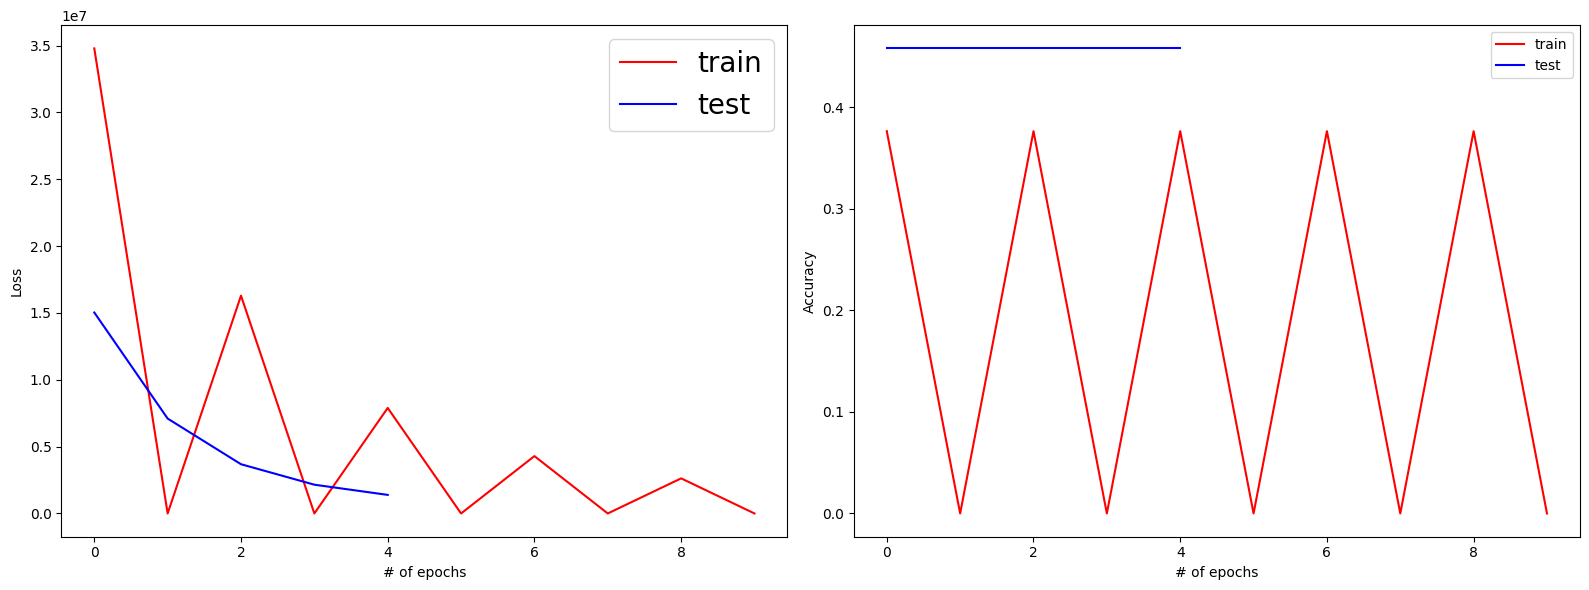

In [22]:
# compile the modal
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


#tranining
# Import necessary callbacks from tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the callbacks list
callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=10),  
    ModelCheckpoint(filepath='model_checkpoint.keras', monitor='val_loss', save_best_only=True, mode='min')  ]

history = model.fit(
    training_set,
    steps_per_epoch=len(training_set),   
    epochs=10,
    validation_data=test_set,
    validation_steps=len(test_set),     
    callbacks=callbacks_list
)

training_set.class_indices


#prediction
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
nepochs = len(history.history['loss'])
plt.plot(range(nepochs), history.history['loss'], 'r-', label='train')
if 'val_loss' in history.history:
    plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], 'b-', label='test')
plt.legend(prop={'size': 20})
plt.ylabel('Loss')
plt.xlabel('# of epochs')

plt.subplot(1, 2, 2)
plt.plot(range(nepochs), history.history.get('accuracy', []), 'r-', label='train')
if 'val_accuracy' in history.history:
    plt.plot(range(len(history.history['val_accuracy'])), history.history['val_accuracy'], 'b-', label='test')
plt.legend(prop={'size': 10})
plt.ylabel('Accuracy')
plt.xlabel('# of epochs')

plt.tight_layout()
plt.show()


In [23]:
training_set.class_indices

{'fake': 0, 'real': 1, 'real copy': 2, 'real copy 2': 3}

In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np
def ImagePrediction(loc):
    test_image = image.load_img(loc, target_size = (128,128))
    plt.axis('off')
    plt.imshow(test_image)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis =0)
    result = model.predict(test_image)
    if result[0][0] == 1:
        predictions = 'Real'
    else:
        predictions = 'Fake'
    print('Prediction: ',predictions)

In [26]:
from PIL import Image
import numpy as np
import os

# Correct the image folder path
image_folder = r'C:\pro\dataset'
image_data = []

def is_image_fake(image):
    # Check for abnormal image size
    width, height = image.size
    if width < 200 or height < 200:  # Small images are often manipulated
        return True
    
    # Convert the image to numpy array
    img_array = np.asarray(image)
    
    # Check for color inconsistency (basic thresholding)
    color_std = np.std(img_array)  # Standard deviation of pixel values
    if color_std < 10:  # Arbitrary threshold, indicates low variance (suspicious)
        return True
    
    return False

# Loop through each image in the folder
for filename in os.listdir(r'C:\pro\dataset'):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(image_folder, filename)
        image = Image.open(image_path)
        
        fake_status = is_image_fake(image)
        image_data.append((filename, "Fake" if fake_status else "Real"))

# Print the results
for data in image_data:
    print("{{'fake': 0, 'real': 1}}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
Prediction:  Fake


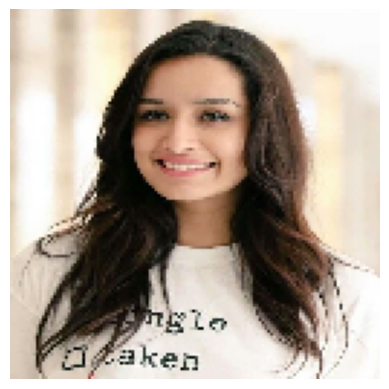

In [27]:
img = input("Enter Location of Image to predict: ")
test_image_2 = ImagePrediction(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction:  Fake


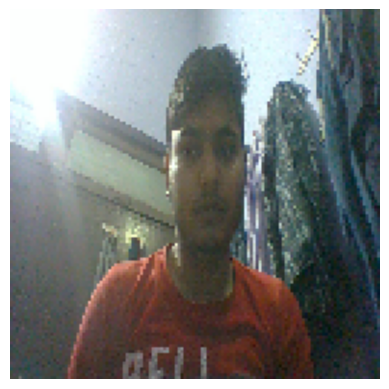

In [28]:
img = input("Enter Location of Image to predict: ")
test_image_2 = ImagePrediction(img)